### Fake currency classification using Random forest classifier. 

In [1]:
import os
from numpy import array
from cv2 import imread, resize

In [11]:
LABELS = ['fake_front', 'fake_rear', 'real_front', 'real_rear']
DIR = './dataset'
DATASET = []
LABELS_SET = []

# reshaping and preprocessing of input images.
for label in LABELS :
    dir_path = os.path.join(DIR, label)

    for item in os.listdir(dir_path) :
        img_path = os.path.join(dir_path, item)
        img = imread(img_path, 0)
        img = resize(img, (400, 200))
        img = array(img) / 255.0 # re scale
        img = img.flatten().tolist()
        DATASET.append(img)
        LABELS_SET.append(LABELS.index(label))

##### Preparing model, 80% for training and 20% for testing.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(DATASET, LABELS_SET, train_size=0.80, test_size=0.20)

In [5]:
print(f"Training set size : {len(x_train)}")
print(f"Test set size : {len(x_test)}")

Training set size : 867
Test set size : 217


#### Training

In [6]:
rfc = RandomForestClassifier(n_estimators=16, criterion='entropy', random_state=64).fit(x_test, y_test) 

#### Making prediction on test set.

In [7]:
prediction = rfc.predict(x_test)

$ Measuring \; metrics $

In [8]:
acc = accuracy_score(y_test, prediction)
f1_sc= f1_score(y_test, prediction, average='weighted')
pre_sc = precision_score(y_test, prediction, average='weighted')
rc_score = recall_score(y_test, prediction, average='weighted')
cm = confusion_matrix(y_test, y_pred=prediction)

print('Accuracy : ', "%.2f" % (acc*100))
print('Precision : ', "%.2f" % (pre_sc*100))
print('Recall score: ', "%.2f" % (rc_score*100))
print('F1 Sore :', "%.2f" % (f1_sc*100))

Accuracy :  99.08
Precision :  99.10
Recall score:  99.08
F1 Sore : 99.08


$ Confusion \; matrix $

<Axes: >

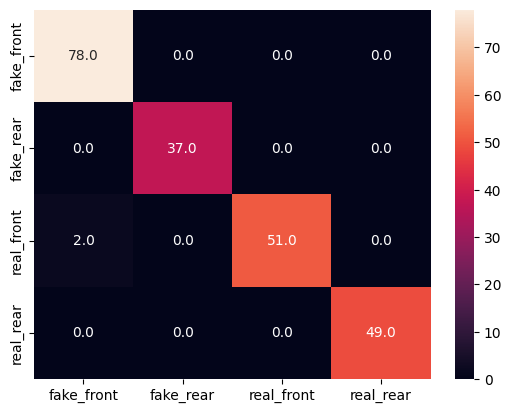

In [9]:
from seaborn import heatmap

heatmap(cm, fmt='.1f', annot=True, xticklabels=LABELS, yticklabels=LABELS)

Saving model

In [12]:
from joblib import dump

dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']